# Social Media Scrapping

## Installation of Praw Package

In [19]:
#!pip install praw

##  Authentication with the Reddit APP by Using Keys.

In [2]:
# importing praw package.
import praw

# entering string into user agent, which is bot to Reddit's servers.
user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
# Creating a Reddit instance by PRAW with reddit app credentials.
reddit = praw.Reddit(
    client_id="g8YbazW8sy1UtDVuiHirpg", #unique client_id of reddit app
    client_secret="fWfc-zzk4QULIzSq4EkZTSg8GjVJrw", #unique client_secert of reddit app
    user_agent=user_agent #User agent string.
)

In [3]:
# importing pandas, numpy, regression package.
import pandas as pd
import numpy as np
import re 

## Information about the Hot Topics in the Bitcoin Reddit

In [4]:
# Hot new rising topics

# Initializing an Empty Set to Store Headlines
headlines = set()
# Writing a Loop through the Hot Topic
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break #Breaking the Loop After processing
    headlines.add(submission.title) #Title of the Submission to the Set of Headlines
print(len(headlines))#Printing the Total Number of Headlines

Bitcoin Newcomers FAQ - Please read!
16bm9de
BitcoinFan7
1694011779.0
206
0.95
https://www.reddit.com/r/Bitcoin/comments/16bm9de/bitcoin_newcomers_faq_please_read/
0


## Counting Unique Titles of Hot Topics in the Bitcoin 

In [5]:
# Initializing an Empty Set to Store Headlines
headlines = set()
# Writing a Loop through the Hot Topic
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    headlines.add(submission.title)#Title of the Submission to the Set of Headlines
print(len(headlines))#Printing the Total Number of Headlines

776


## Creation of Dataframe

In [6]:
# Creating a Dataset from the List of Headlines
bitcoin_df = pd.DataFrame(headlines)
bitcoin_df.head() #Displaying First 5 Rows

,0
0,US Attack On Bitcoin Mining (Please Help)
1,DCA Project : BTC or leveraged BTC ETF ?
2,Wired covering faketoshi's litigation against ...
3,Summarise Bitcoin as if I was 10y/o.
4,Network Topologies; Issue Politics; and Bitcoin:


In [7]:
# Retrieving the Column Names of the DataFrame
bitcoin_df.columns

RangeIndex(start=0, stop=1, step=1)

## Changing Column Name

In [8]:
# Changing the Column Name
bitcoin_df.columns = ['Titles']

In [9]:
#Displaying First 5 Rows
bitcoin_df.head()

,Titles
0,US Attack On Bitcoin Mining (Please Help)
1,DCA Project : BTC or leveraged BTC ETF ?
2,Wired covering faketoshi's litigation against ...
3,Summarise Bitcoin as if I was 10y/o.
4,Network Topologies; Issue Politics; and Bitcoin:


## Checking for Dulpicates in Column

In [10]:
# Number of Duplicate Title in the 'Titles' column
bitcoin_df.Titles.duplicated().sum()

0

## Cleaning the text

In [29]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(cleanTxt)

#Show the clean text
bitcoin_df.head()

,Titles
0,Why I HODL over ETF
1,Found a MAJOR discrepancy in price of BTC on e...
2,Sorry/Congrats to everyone
3,Why BTC and Most Cryptos can never reach $0 an...
4,How legitimate is Blue Wallet?


## Removing the emoji's from Reddit App

In [30]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)

#Show the clean text
bitcoin_df.head()

,Titles
0,Why I HODL over ETF
1,Found a MAJOR discrepancy in price of BTC on e...
2,Sorry/Congrats to everyone
3,Why BTC and Most Cryptos can never reach $0 an...
4,How legitimate is Blue Wallet?


## Installing Textblob Package

In [31]:
#Installing Textblob Package
!pip install textblob

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
     ---- -------------------------------- 81.9/636.8 kB 255.1 kB/s eta 0:00:03
     ---- -------------------------------- 81.9/636.8 kB 255.1 kB/s eta 0:00:03
     ---- -------------------------------- 81.9/636.8 kB 255.1 kB/s eta 0:00:03
     ------ ----------------------------- 112.6/636.8 kB 261.9 kB/s eta 0:00:03
     ------ ----------------------------- 112.6/636.8 kB 261.9 kB/s eta 0:00:03
     --------- -------------------------- 163.8/636.8 kB 297.7 kB/s eta 0:00:02
   

In [32]:
# Importing Textblob, WordCloud, Stopwords Libraries.
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

## Sentiment Analysis on Reddit

In [33]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

#Now display data
bitcoin_df.head()

,Titles,Subjectivity,Polarity
0,Why I HODL over ETF,0.00,0.000000
1,Found a MAJOR discrepancy in price of BTC on e...,0.50,0.062500
2,Sorry/Congrats to everyone,0.00,0.000000
3,Why BTC and Most Cryptos can never reach $0 an...,0.45,0.166667
4,How legitimate is Blue Wallet?,0.10,0.000000


In [34]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0: # If the polarity score is less than 0, "Negative"
        return "Negative"
    elif score == 0: # If the polarity score is Equal to 0, "Equal"
        return "Neutral"
    else: # If the polarity score is more than to 0, "Positive"
        return "Positive"
# Applying the getInsight function to the 'Polarity' column and creating a new column 'Insight' to store   
bitcoin_df["Insight"] = bitcoin_df["Polarity"].apply(getInsight)

# Displaying the first 50 rows
bitcoin_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Why I HODL over ETF,0.000000,0.000000,Neutral
1,Found a MAJOR discrepancy in price of BTC on e...,0.500000,0.062500,Positive
2,Sorry/Congrats to everyone,0.000000,0.000000,Neutral
3,Why BTC and Most Cryptos can never reach $0 an...,0.450000,0.166667,Positive
4,How legitimate is Blue Wallet?,0.100000,0.000000,Neutral
5,"Lightning Thursday! February 01, 2024 Explore...",0.000000,0.000000,Neutral
6,This is the year,0.000000,0.000000,Neutral
7,"Daily Discussion, February 06, 2024",0.000000,0.000000,Neutral
8,Bitcoin ETF advertisement all over Boston subways,0.000000,0.000000,Neutral
9,Mempool gone crazy,0.900000,-0.600000,Negative


## Data Visualization

In [35]:
# Import seaborn library, warnings, Wordcloud, Stopwords, Matplotlib libraries
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# Set the plotting style to 'fivethirtyeight'
plt.style.use('fivethirtyeight')

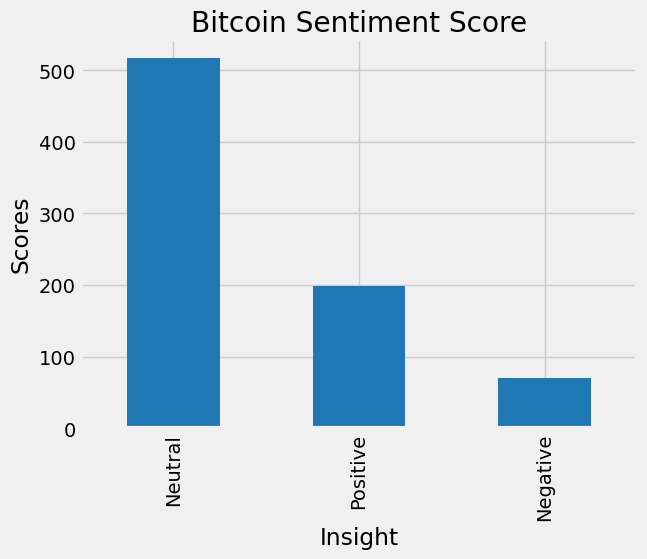

In [36]:
#Plot the values count of sentiment
plt.title("Bitcoin Sentiment Score") # Setting the title
plt.xlabel("Sentiment")  # Setting the label for the x-axis
plt.ylabel("Scores") # Setting the label for the y-axis
plt.rcParams["figure.figsize"] = (10,8) # Setting the size
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4") # Plotting the value counts of 'Insight' column
plt.show() # Display the plot

## Wordcloud for Column

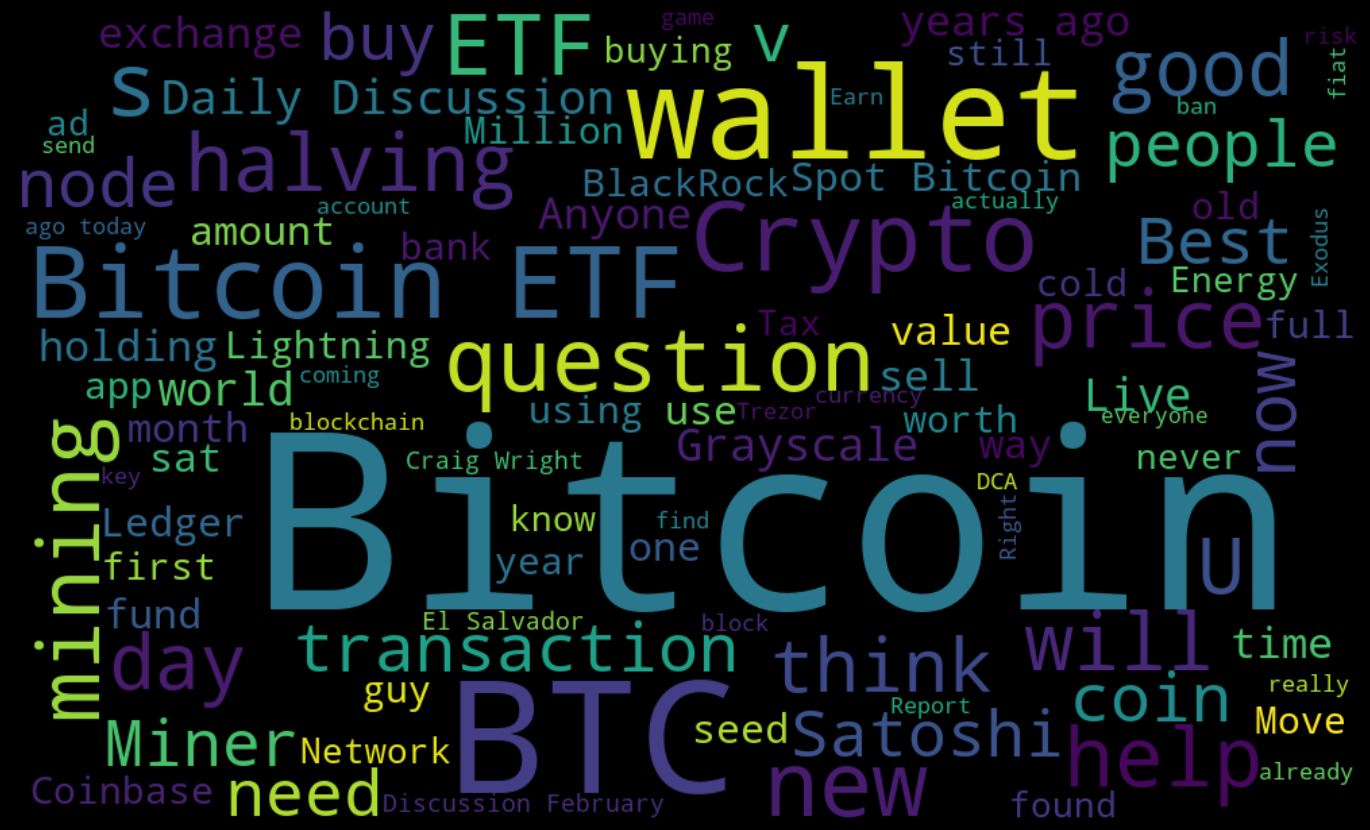

In [37]:
text = ' '.join( [twts for twts in bitcoin_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' ) # Setting the size and background color
plt.imshow(wordcloud, interpolation='bilinear') # Display the word cloud
plt.axis("off"); # Turn off the axis